#### Machine Learning: Regression Analysis

##### Importing libraries & data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [5]:
#Define Path
path = r'C:\Users\danac\Downloads\Achievement 6\Data\Cleaned Data\cleaned_data.xlsx'

In [7]:
#Importing Data
dataframe = pd.read_excel(path)

##### 3. Data preparation for regression analysis

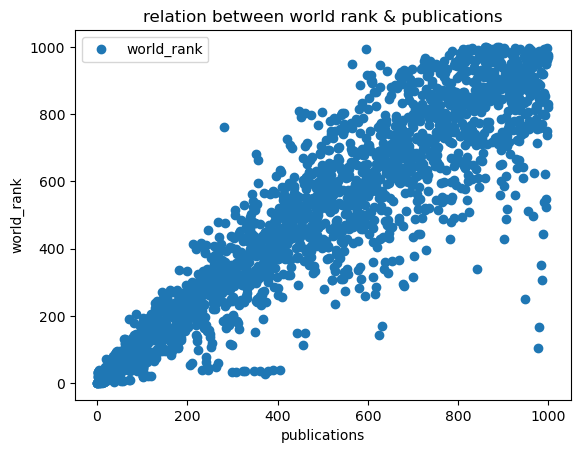

In [15]:
#Creating a scatterplot using matplotlib to look at how the chosen variables plot against each other.

dataframe.plot(x = 'publications', y='world_rank',style='o') 
plt.title('relation between world rank & publications')  
plt.xlabel('publications')  
plt.ylabel('world_rank')  
plt.show()

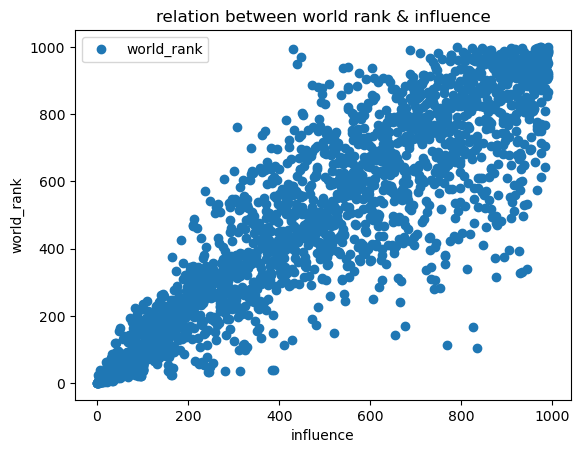

In [9]:
#Creating a scatterplot using matplotlib to look at how the chosen variables plot against each other.

dataframe.plot(x = 'influence', y='world_rank',style='o') 
plt.title('relation between world rank & influence')  
plt.xlabel('influence')  
plt.ylabel('world_rank')  
plt.show()

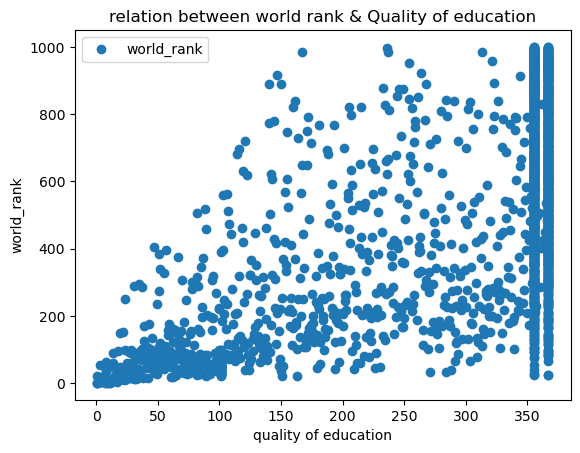

In [11]:
#Creating a scatterplot using matplotlib to look at how the chosen variables plot against each other.

dataframe.plot(x = 'quality_of_education', y='world_rank',style='o') 
plt.title('relation between world rank & Quality of education')  
plt.xlabel('quality of education')  
plt.ylabel('world_rank')  
plt.show()

In [17]:
#Reshaping the variables into NumPy arrays and put them into separate objects.

X = dataframe['publications'].values.reshape(-1,1)
y = dataframe['world_rank'].values.reshape(-1,1)

In [19]:
X

array([[  1],
       [ 12],
       [  4],
       ...,
       [830],
       [886],
       [861]], dtype=int64)

In [21]:
y

array([[   1],
       [   2],
       [   3],
       ...,
       [ 998],
       [ 999],
       [1000]], dtype=int64)

In [23]:
#Spliting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##### Regression Analysis

In [26]:
#Creating a regression object.

regression = LinearRegression() 

In [28]:
#Fiting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
#Predict the values of y using X.

y_predicted = regression.predict(X_test)

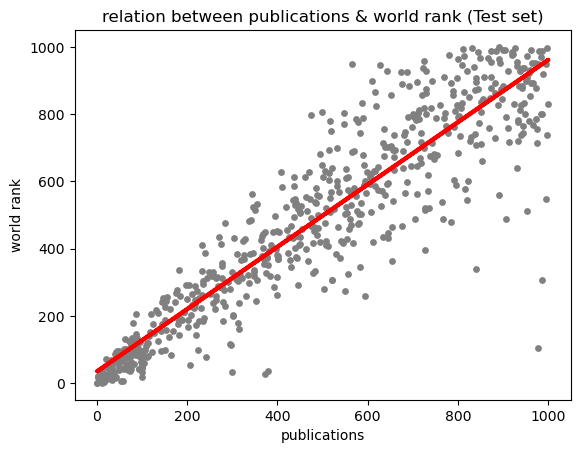

In [32]:
#Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('relation between publications & world rank (Test set)')
plot_test.xlabel('publications')
plot_test.ylabel('world rank')
plot_test.show()

In [34]:
#Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [36]:
#Printing the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.92663174]]
Mean squared error:  13689.22850008424
R2 score:  0.8517912567513867


##### Regresion Analysis

##### Slope: For every one-unit increase in publications rank (worse publications performance), the world_rank increases by approximately 0.93 units, on average.This indicates that there is a positive relationship between publications rank and world_rank.That is, universities with a worse publications rank tend to have a worse world_rank.

##### The MSE appears to be relatively high, which could suggest that although the model is strong, there is some variability in the data that is not being fully explained by publications.

##### The model has a high R² (85.18%). It means that 85.18% of the variability in world_rank can be explained by the variable publications in the model.

In [44]:
y_predicted

array([[139.59567827],
       [222.0659032 ],
       [147.93536393],
       [ 77.51135163],
       [557.50659337],
       [ 54.34555811],
       [330.48181688],
       [313.80244554],
       [236.89201105],
       [853.10211869],
       [574.18596471],
       [837.3493791 ],
       [726.1535702 ],
       [633.49039612],
       [923.526131  ],
       [516.73479678],
       [949.47181974],
       [611.25123434],
       [747.46610024],
       [868.85485829],
       [733.56662413],
       [522.29458722],
       [293.41654724],
       [599.20502171],
       [685.38177361],
       [892.94728355],
       [589.01207256],
       [397.19930221],
       [202.60663664],
       [104.38367212],
       [910.55328663],
       [ 97.89724993],
       [ 95.11735471],
       [297.12307421],
       [701.1345132 ],
       [938.35223885],
       [946.69192452],
       [672.40892924],
       [114.57662127],
       [639.97681831],
       [128.47609738],
       [633.49039612],
       [199.82674142],
       [200

In [46]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,121,139.595678
1,168,222.065903
2,92,147.935364
3,65,77.511352
4,529,557.506593
5,71,54.345558
6,366,330.481817
7,200,313.802446
8,247,236.892011
9,864,853.102119


#### Compare how the regression fits the training set

In [49]:
# Predict.
y_predicted_train = regression.predict(X_train)

In [51]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.92663174]]
Mean squared error:  13708.74015994238
R2 score:  0.852025731776532


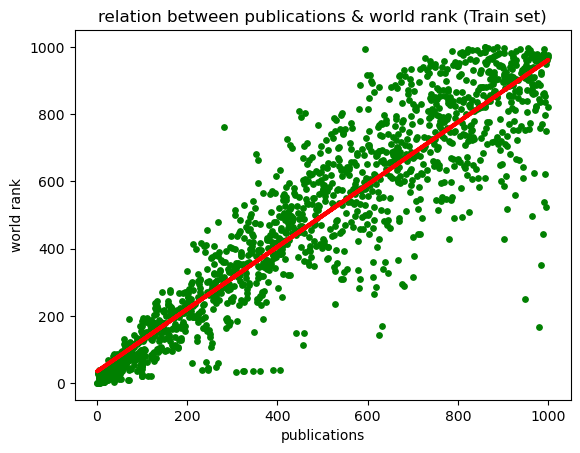

In [55]:
#Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('relation between publications & world rank (Train set)')
plot_test.xlabel('publications')
plot_test.ylabel('world rank')
plot_test.show()

#### Regression Analysis

##### Slope: The slope of the model remains 0.9266 . This indicates that for every one-unit increase in publications rank, world_rank increases by approximately 0.93 units, on average. Interpretation :There is a positive relationship between the two variables. Universities with a worse publications rank (higher numbers) tend to have a worse world_rank (also higher numbers).

##### The MSE is 13,708.74 . Although the absolute value seems large, to assess its significance it should be compared to the overall range of the data in world_rank (e.g. the difference between the maximum and minimum rank). If the range of world_rank values ​​has values ​​that vary widely (e.g. from 1 to 1000), this MSE can be considered acceptable in the context of the data.

##### The R² Score is 0.8520 , indicating that 85.20% of the variation in world_rank is explained by publicationsin the training set. This suggests that the model has a very good fit in the training set. publicationsis a highly relevant variable for predicting world_rank, although there is still 14.80% of variability in world_rank that is not explained by this variable, possibly due to factors not considered in the model.